In [1]:
import sys
sys.path.append("..")

from src.data.datasets.melody_dataset import MelodyDataset
from src.data.loaders.melody_loader import get_dataloader
from src.data.structures.sample import Sample

In [2]:
train_dataset = MelodyDataset.from_path("..\\datasets\\melody_extraction\\processed\\train")

Slicing audio and melody: 100%|██████████| 103/103 [00:07<00:00, 13.15it/s]


Длительность аудио: 7.4996825396825395
Длительность мелодии: 7.5


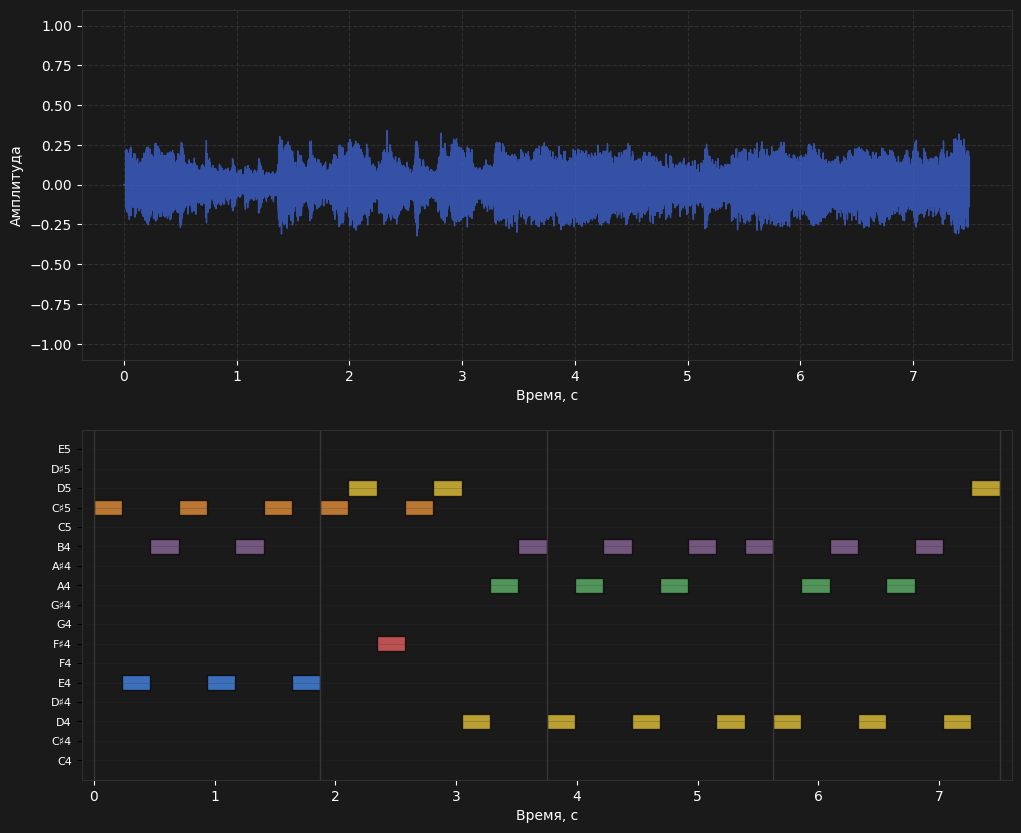

In [3]:
idx = 0
audio = train_dataset.sliced_audio[idx]
melody = train_dataset.sliced_melody[idx]

sample = Sample(audio, melody)
sample.visualize_with_waveform()

print(f"Длительность аудио: {audio.duration}")
print(f"Длительность мелодии: {melody.duration}")

In [4]:
train_loader = get_dataloader(train_dataset, batch_size=32, num_workers=0, shuffle=False)
data = next(iter(train_loader))

spectrograms = data[0]
freqs = data[1]
durations = data[2]
len_seqs = data[3]

In [5]:
spectrograms.shape

torch.Size([32, 1, 128, 256])

In [6]:
freqs.shape

torch.Size([32, 32])

In [7]:
durations.shape

torch.Size([32, 32])

In [8]:
len_seqs.shape

torch.Size([32, 1])

In [10]:
freqs[idx]

tensor([0.6381, 0.5857, 0.6265, 0.6381, 0.5857, 0.6265, 0.6381, 0.5857, 0.6381,
        0.6439, 0.5974, 0.6381, 0.6439, 0.5741, 0.6148, 0.6265, 0.5741, 0.6148,
        0.6265, 0.5741, 0.6148, 0.6265, 0.5741, 0.6265, 0.5741, 0.6148, 0.6265,
        0.5741, 0.6148, 0.6265, 0.5741, 0.6439])

In [11]:
durations[idx]

tensor([0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256,
        0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256,
        0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256,
        0.0256, 0.0256, 0.0256, 0.0256, 0.0256])

In [12]:
len_seqs

tensor([[0.4921],
        [0.4921],
        [0.4921],
        [0.4921],
        [0.4921],
        [0.3810],
        [0.2063],
        [0.2063],
        [0.2381],
        [0.3492],
        [0.3175],
        [0.2857],
        [0.2698],
        [0.2222],
        [0.2222],
        [0.3016],
        [0.3333],
        [0.3016],
        [0.3810],
        [0.2381],
        [0.1905],
        [0.1905],
        [0.1905],
        [0.2540],
        [0.3016],
        [0.2698],
        [0.2857],
        [0.2540],
        [0.2698],
        [0.2381],
        [0.1905],
        [0.1905]])

In [13]:
from src.nn.models.MelodyNet import MelodyNet

model = MelodyNet()

freqs, durations, seq_len = model.forward(spectrograms)

In [14]:
freqs.shape

torch.Size([32, 64])

In [15]:
freqs

tensor([[0.3669, 0.4510, 0.4360,  ..., 0.4227, 0.3617, 0.5294],
        [0.3913, 0.4421, 0.4597,  ..., 0.4197, 0.3818, 0.5689],
        [0.3771, 0.4799, 0.4422,  ..., 0.4598, 0.3651, 0.5668],
        ...,
        [0.3549, 0.4736, 0.4312,  ..., 0.4231, 0.3654, 0.5630],
        [0.3728, 0.4524, 0.4498,  ..., 0.4520, 0.3675, 0.5713],
        [0.3686, 0.4556, 0.4374,  ..., 0.4281, 0.3572, 0.5371]],
       grad_fn=<SigmoidBackward0>)

In [16]:
durations.shape

torch.Size([32, 64])

In [17]:
durations

tensor([[0.5268, 0.5619, 0.5693,  ..., 0.6956, 0.4693, 0.4996],
        [0.5389, 0.5746, 0.5686,  ..., 0.6941, 0.4846, 0.5061],
        [0.5234, 0.5902, 0.5361,  ..., 0.7469, 0.5031, 0.5237],
        ...,
        [0.5604, 0.5587, 0.5226,  ..., 0.7136, 0.5014, 0.5112],
        [0.4855, 0.5616, 0.5869,  ..., 0.7179, 0.4798, 0.4850],
        [0.4789, 0.5638, 0.5503,  ..., 0.7291, 0.5107, 0.5161]],
       grad_fn=<SigmoidBackward0>)

In [18]:
len_seqs.shape

torch.Size([32, 1])

In [19]:
len_seqs

tensor([[0.4921],
        [0.4921],
        [0.4921],
        [0.4921],
        [0.4921],
        [0.3810],
        [0.2063],
        [0.2063],
        [0.2381],
        [0.3492],
        [0.3175],
        [0.2857],
        [0.2698],
        [0.2222],
        [0.2222],
        [0.3016],
        [0.3333],
        [0.3016],
        [0.3810],
        [0.2381],
        [0.1905],
        [0.1905],
        [0.1905],
        [0.2540],
        [0.3016],
        [0.2698],
        [0.2857],
        [0.2540],
        [0.2698],
        [0.2381],
        [0.1905],
        [0.1905]])